In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
full_zips_df = pd.read_csv("full_zip_codes.csv", index_col="ZIPCODE")
short_zips_list_df = pd.read_csv("Preliminary_zip_route_weight.csv", index_col="Zipcode")

In [4]:
full_zips_df.head()

,TOTAL_POPULATION,TOTAL_HOUSEHOLDS,MEDIAN_HOUSEHOLD_INCOME,MEAN_HOUSEHOLD_INCOME,TOTAL_HOUSING_UNITS
ZIPCODE,,,,,
78701,7875,4855,112201,173289,6576
78702,22876,8937,54053,73919,9839
78703,20788,9723,98553,166396,11047
78704,47158,23213,66262,91223,25815
78705,33075,8370,15309,41357,10336


In [5]:
short_zips_list_df.head()


,Route,Weight
Zipcode,,
78721,PAF73,581400
78724,PH21,583480
78741,PT31,478260
78723,PAF52,581400
78745,PAT54,626580


In [6]:
# merge datasets
merged_zips = full_zips_df.merge(short_zips_list_df, how="inner", left_index=True, right_index=True)
merged_zips.head(10)

,TOTAL_POPULATION,TOTAL_HOUSEHOLDS,MEDIAN_HOUSEHOLD_INCOME,MEAN_HOUSEHOLD_INCOME,TOTAL_HOUSING_UNITS,Route,Weight
78701,7875,4855,112201,173289,6576,PF32,458460
78703,20788,9723,98553,166396,11047,PAF04,651640
78703,20788,9723,98553,166396,11047,PF33,538940
78704,47158,23213,66262,91223,25815,PAT50,556560
78721,12447,4197,41611,52873,4632,PAF73,581400
78723,33170,12518,49606,71897,13777,PAF52,581400
78724,24833,6360,45158,55252,6754,PH21,583480
78726,14610,5554,88322,122559,5998,PAW80,809480
78727,28999,12937,74458,88800,14029,PAW51,842000
78731,27447,12556,89099,140009,13476,PAH03,753460


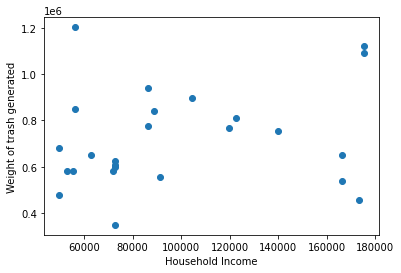

In [7]:
plt.scatter(merged_zips.MEAN_HOUSEHOLD_INCOME, merged_zips.Weight)
plt.xlabel('Household Income')
plt.ylabel('Weight of trash generated')
plt.show()

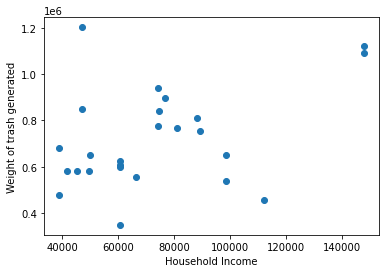

In [8]:
plt.scatter(merged_zips.MEDIAN_HOUSEHOLD_INCOME, merged_zips.Weight)
plt.xlabel('Household Income')
plt.ylabel('Weight of trash generated')
plt.show()

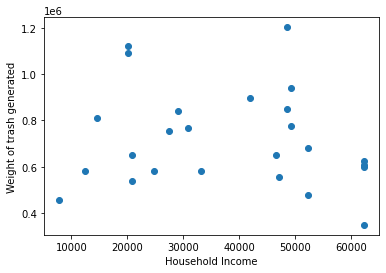

In [9]:
plt.scatter(merged_zips.TOTAL_POPULATION, merged_zips.Weight)
plt.xlabel('Household Income')
plt.ylabel('Weight of trash generated')
plt.show()

In [10]:
X = merged_zips.TOTAL_POPULATION.values.reshape(-1, 1)

In [11]:
X.shape

(25, 1)

In [12]:
y = merged_zips.Weight

In [13]:
model = LinearRegression()

In [14]:
model.fit(X,y)

LinearRegression()

In [15]:
y_pred = model.predict(X)
print(y_pred.shape)

(25,)


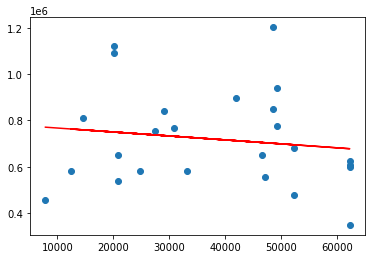

In [32]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()